# Recommendations with IBM

In this notebook, you will be putting your recommendation skills to use on real data from the IBM Watson Studio platform. 


You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/rubrics/3325/view).  **Please save regularly.**

By following the table of contents, you will build out a number of different methods for making recommendations that can be used for different situations. 


## Table of Contents

I. [Exploratory Data Analysis](#Exploratory-Data-Analysis)<br>
II. [Rank Based Recommendations](#Rank)<br>
III. [User-User Based Collaborative Filtering](#User-User)<br>
IV. [Content Based Recommendations (EXTRA - NOT REQUIRED)](#Content-Recs)<br>
V. [Matrix Factorization](#Matrix-Fact)<br>
VI. [Extras & Concluding](#conclusions)

At the end of the notebook, you will find directions for how to submit your work.  Let's get started by importing the necessary libraries and reading in the data.

In [100]:
#%matplotlib inline  # Enable inline plotting
import pandas as pd  # Import the pandas library for data manipulation
import numpy as np  # Import the numpy library for numerical operations
import matplotlib.pyplot as plt  # Import the matplotlib library for data visualization
import project_tests as t  # Import project tests for evaluation
import pickle  # Import pickle for data serialization
import seaborn as sns  # Import seaborn for advanced data visualization


# Read the user-item interactions data from CSV file
df = pd.read_csv('data/user-item-interactions.csv')

# Read the articles and community data from CSV file
df_content = pd.read_csv('data/articles_community.csv')

# Delete the unnecessary 'Unnamed: 0' column from both DataFrames
del df['Unnamed: 0']
del df_content['Unnamed: 0']

# Get an initial overview of the user-item interactions data
df.head(3)  # Display the first 3 rows of the DataFrame


,article_id,title,email
0,1430.0,"using pixiedust for fast, flexible, and easier...",ef5f11f77ba020cd36e1105a00ab868bbdbf7fe7
1,1314.0,healthcare python streaming application demo,083cbdfa93c8444beaa4c5f5e0f5f9198e4f9e0b
2,1429.0,use deep learning for image classification,b96a4f2e92d8572034b1e9b28f9ac673765cd074


In [101]:
#Data Exploration Steps -2
df[df['email']=="ef5f11f77ba020cd36e1105a00ab868bbdbf7fe7"].head(5)

,article_id,title,email
0,1430.0,"using pixiedust for fast, flexible, and easier...",ef5f11f77ba020cd36e1105a00ab868bbdbf7fe7
268,1430.0,"using pixiedust for fast, flexible, and easier...",ef5f11f77ba020cd36e1105a00ab868bbdbf7fe7
1143,732.0,rapidly build machine learning flows with dsx,ef5f11f77ba020cd36e1105a00ab868bbdbf7fe7
1562,1429.0,use deep learning for image classification,ef5f11f77ba020cd36e1105a00ab868bbdbf7fe7
1710,43.0,deep learning with tensorflow course by big da...,ef5f11f77ba020cd36e1105a00ab868bbdbf7fe7


In [102]:
#Data Exploration Steps -3
print("shape of the df is {} by {}".format(df.shape[0],df.shape[1]))

shape of the df is 45993 by 3


In [103]:
#Data Exploration Steps -4
df_content.head(5)

,doc_body,doc_description,doc_full_name,doc_status,article_id
0,Skip navigation Sign in SearchLoading...\r\n\r...,Detect bad readings in real time using Python ...,Detect Malfunctioning IoT Sensors with Streami...,Live,0
1,No Free Hunch Navigation * kaggle.com\r\n\r\n ...,"See the forest, see the trees. Here lies the c...",Communicating data science: A guide to present...,Live,1
2,☰ * Login\r\n * Sign Up\r\n\r\n * Learning Pat...,Here’s this week’s news in Data Science and Bi...,"This Week in Data Science (April 18, 2017)",Live,2
3,"DATALAYER: HIGH THROUGHPUT, LOW LATENCY AT SCA...",Learn how distributed DBs solve the problem of...,DataLayer Conference: Boost the performance of...,Live,3
4,Skip navigation Sign in SearchLoading...\r\n\r...,This video demonstrates the power of IBM DataS...,Analyze NY Restaurant data using Spark in DSX,Live,4


In [104]:
#Data Exploration Steps -5
print("shape of the df_content is {} by {}".format(df_content.shape[0],df_content.shape[1]))
print("range of article_id's in between {} and {}".format(df_content['article_id'].max(),df_content['article_id'].min()))

shape of the df_content is 1056 by 5
range of article_id's in between 1050 and 0


In [105]:
#Data Exploration Steps -6
#Sample row with More Detailed Analysis
print(df_content.iloc[0,1])
print(df_content.iloc[0,2])
df_content[df_content['article_id']==0]

Detect bad readings in real time using Python and Streaming Analytics.
Detect Malfunctioning IoT Sensors with Streaming Analytics


,doc_body,doc_description,doc_full_name,doc_status,article_id
0,Skip navigation Sign in SearchLoading...\r\n\r...,Detect bad readings in real time using Python ...,Detect Malfunctioning IoT Sensors with Streami...,Live,0


### <a class="anchor" id="Exploratory-Data-Analysis">Part I : Exploratory Data Analysis</a>

Use the dictionary and cells below to provide some insight into the descriptive statistics of the data.

`1.` What is the distribution of how many articles a user interacts with in the dataset?  Provide a visual and descriptive statistics to assist with giving a look at the number of times each user interacts with an article.  

In [106]:
#Data Exploration Steps -7
df[df['email']=="ffe3d0543c9046d35c2ee3724ea9d774dff98a32"].head()

,article_id,title,email
28095,1047.0,a comparison of logistic regression and naive ...,ffe3d0543c9046d35c2ee3724ea9d774dff98a32
28096,1422.0,use r dataframes & ibm watson natural language...,ffe3d0543c9046d35c2ee3724ea9d774dff98a32
28097,1425.0,use spark for r to load data and run sql queries,ffe3d0543c9046d35c2ee3724ea9d774dff98a32
28098,315.0,neurally embedded emojis,ffe3d0543c9046d35c2ee3724ea9d774dff98a32
28099,878.0,10 data science podcasts you need to be listen...,ffe3d0543c9046d35c2ee3724ea9d774dff98a32


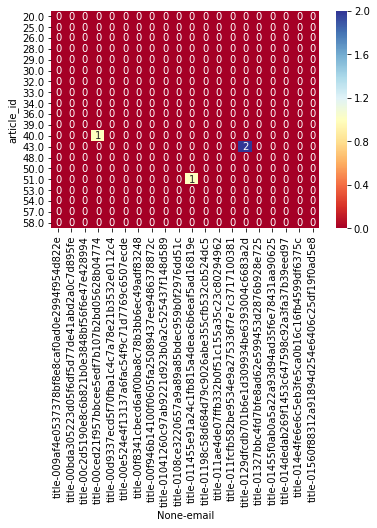

In [107]:
# Create Pivot Table
df_pivot = pd.pivot_table(df, index="article_id", columns="email", aggfunc="count" , fill_value=0)
#It is shortened due to calculation capacity.
df_pivot_shortened = df_pivot.iloc[10:30, 10:30]
sns.heatmap(df_pivot_shortened, annot=True,cmap="RdYlBu")

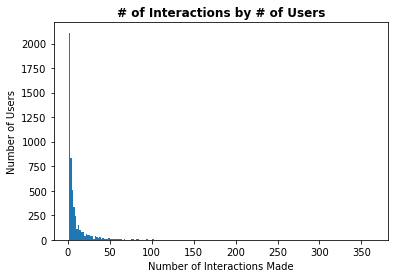

** Descriptive Statistics of the Number of Interactions: **


count    5149.000000
mean        8.932414
std        16.801011
min         1.000000
25%         1.000000
50%         3.000000
75%         9.000000
max       364.000000
Name: email, dtype: float64

In [108]:
#we need to calculate number of interactions per user.
user_interaction = df.email.value_counts(dropna=False)

#Histogram of Number of Interactions among users
plt.hist(user_interaction,bins=200)
plt.xlabel('Number of Interactions Made')
plt.ylabel('Number of Users')
plt.title('# of Interactions by # of Users', fontweight = "bold")
plt.show()

#It shows that waste majority of the users have 10 or less interaction!
print("** Descriptive Statistics of the Number of Interactions: **")
user_interaction.describe()

In [109]:
# Fill in the median and maximum number of user_article interactions below
user_interaction.describe()
median_val = user_interaction.describe()[5]
max_views_by_user = user_interaction.describe()[7]
print("median value is: {}".format(median_val))
print("maximum value is: {}".format(max_views_by_user))

median value is: 3.0
maximum value is: 364.0


`2.` Explore and remove duplicate articles from the **df_content** dataframe.  

In [110]:
# Find and explore duplicate articles
print("** Duplicate Articles **")
print(df_content.article_id.value_counts()[df_content.article_id.value_counts()>1])

** Duplicate Articles **
221    2
232    2
577    2
398    2
50     2
Name: article_id, dtype: int64


In [111]:
# Remove any rows that have the same article_id - only keep the first
df_content = df_content.drop_duplicates(subset=['article_id'], keep='first')
print("Dropping the duplicates..... \n")
print("New Maximum Number of Apperance is {}".format(df_content.article_id.value_counts().max()))

Dropping the duplicates..... 

New Maximum Number of Apperance is 1


`3.` Use the cells below to find:

**a.** The number of unique articles that have an interaction with a user.  
**b.** The number of unique articles in the dataset (whether they have any interactions or not).<br>
**c.** The number of unique users in the dataset. (excluding null values) <br>
**d.** The number of user-article interactions in the dataset.

In [112]:
print("The number of unique articles that have an interaction with a user is {}".format(df['article_id'].unique().shape[0]))

print("The number of unique articles in the dataset (whether they have any interactions or not) is {}".format(df_content['article_id'].unique().shape[0]))

print("The number of unique users in the dataset. (excluding null values) is {}".format(df['email'].dropna().unique().shape[0]))

print("The number of user-article interactions in the datase is {}".format(df.shape[0]))

The number of unique articles that have an interaction with a user is 714
The number of unique articles in the dataset (whether they have any interactions or not) is 1051
The number of unique users in the dataset. (excluding null values) is 5148
The number of user-article interactions in the datase is 45993


In [113]:
unique_articles = df['article_id'].unique().shape[0]
total_articles = df_content['article_id'].unique().shape[0]
unique_users = df['email'].dropna().unique().shape[0]
user_article_interactions = df.shape[0]

`4.` Use the cells below to find the most viewed **article_id**, as well as how often it was viewed.  After talking to the company leaders, the `email_mapper` function was deemed a reasonable way to map users to ids.  There were a small number of null values, and it was found that all of these null values likely belonged to a single user (which is how they are stored using the function below).

In [114]:
#Training Part for the code below.
print(df.mode().article_id[0])
df[df['article_id']==1429.0].shape[0]

1429.0


937

In [115]:
most_viewed_article_id = str(df.mode().article_id[0])
max_views = df[df['article_id']==1429.0].shape[0]

In [116]:
## No need to change the code here - this will be helpful for later parts of the notebook
# Run this cell to map the user email to a user_id column and remove the email column

def email_mapper():
    coded_dict = dict()
    cter = 1
    email_encoded = []
    
    for val in df['email']:
        if val not in coded_dict:
            coded_dict[val] = cter
            cter+=1
        
        email_encoded.append(coded_dict[val])
    return email_encoded

email_encoded = email_mapper()
del df['email']
df['user_id'] = email_encoded

# show header
df.head()

,article_id,title,user_id
0,1430.0,"using pixiedust for fast, flexible, and easier...",1
1,1314.0,healthcare python streaming application demo,2
2,1429.0,use deep learning for image classification,3
3,1338.0,ml optimization using cognitive assistant,4
4,1276.0,deploy your python model as a restful api,5


In [117]:
## If you stored all your results in the variable names above, 
## you shouldn't need to change anything in this cell

sol_1_dict = {
    '`50% of individuals have _____ or fewer interactions.`': median_val,
    '`The total number of user-article interactions in the dataset is ______.`': user_article_interactions,
    '`The maximum number of user-article interactions by any 1 user is ______.`': max_views_by_user,
    '`The most viewed article in the dataset was viewed _____ times.`': max_views,
    '`The article_id of the most viewed article is ______.`': most_viewed_article_id,
    '`The number of unique articles that have at least 1 rating ______.`': unique_articles,
    '`The number of unique users in the dataset is ______`': unique_users,
    '`The number of unique articles on the IBM platform`': total_articles
}

# Test your dictionary against the solution
t.sol_1_test(sol_1_dict)

It looks like you have everything right here! Nice job!


### <a class="anchor" id="Rank">Part II: Rank-Based Recommendations</a>

Unlike in the earlier lessons, we don't actually have ratings for whether a user liked an article or not.  We only know that a user has interacted with an article.  In these cases, the popularity of an article can really only be based on how often an article was interacted with.

`1.` Fill in the function below to return the **n** top articles ordered with most interactions as the top. Test your function using the tests below.

In [118]:
#Training Part for the code below.
top_articles = df['title'].value_counts().reset_index(name='frequency').sort_values('frequency', ascending=False)['index'].head()

In [119]:
def get_top_articles(n, df=df):
    '''
    INPUT:
    n - (int) the number of top articles to return
    df - (pandas dataframe) df as defined at the top of the notebook 
    
    OUTPUT:
    top_articles - (list) A list of the top 'n' article titles 
    
    '''
    top_articles = df['title'].value_counts().reset_index(name='frequency').sort_values('frequency', ascending=False)['index'].head(n)
    top_articles = list(top_articles)
    return top_articles # Return the top article titles from df (not df_content)

def get_top_article_ids(n, df=df):
    '''
    INPUT:
    n - (int) the number of top articles to return
    df - (pandas dataframe) df as defined at the top of the notebook 
    
    OUTPUT:
    top_articles - (list) A list of the top 'n' article titles 
    
    '''
    top_articles = df['article_id'].value_counts().reset_index(name='frequency').sort_values('frequency', ascending=False)['index'].head(n)
    top_articles = list(top_articles)
    return top_articles # Return the top article ids

In [120]:
#Check for output control of the functions
print(get_top_articles(10))
print(get_top_article_ids(10))

['use deep learning for image classification', 'insights from new york car accident reports', 'visualize car data with brunel', 'use xgboost, scikit-learn & ibm watson machine learning apis', 'predicting churn with the spss random tree algorithm', 'healthcare python streaming application demo', 'finding optimal locations of new store using decision optimization', 'apache spark lab, part 1: basic concepts', 'analyze energy consumption in buildings', 'gosales transactions for logistic regression model']
[1429.0, 1330.0, 1431.0, 1427.0, 1364.0, 1314.0, 1293.0, 1170.0, 1162.0, 1304.0]


In [121]:
# Test your function by returning the top 5, 10, and 20 articles
top_5 = get_top_articles(5)
top_10 = get_top_articles(10)
top_20 = get_top_articles(20)

# Test each of your three lists from above
t.sol_2_test(get_top_articles)

Your top_5 looks like the solution list! Nice job.
Your top_10 looks like the solution list! Nice job.
Your top_20 looks like the solution list! Nice job.


### <a class="anchor" id="User-User">Part III: User-User Based Collaborative Filtering</a>


`1.` Use the function below to reformat the **df** dataframe to be shaped with users as the rows and articles as the columns.  

* Each **user** should only appear in each **row** once.


* Each **article** should only show up in one **column**.  


* **If a user has interacted with an article, then place a 1 where the user-row meets for that article-column**.  It does not matter how many times a user has interacted with the article, all entries where a user has interacted with an article should be a 1.  


* **If a user has not interacted with an item, then place a zero where the user-row meets for that article-column**. 

Use the tests to make sure the basic structure of your matrix matches what is expected by the solution.

In [122]:
#Training Part for the code below.
df_non_binarized = df.pivot_table(values='title', index='user_id', columns='article_id', aggfunc='count').fillna(0)
df_non_binarized[df_non_binarized > 0] = 1
df_non_binarized.head(5)

article_id,0.0,2.0,4.0,8.0,9.0,12.0,14.0,15.0,16.0,18.0,...,1434.0,1435.0,1436.0,1437.0,1439.0,1440.0,1441.0,1442.0,1443.0,1444.0
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [123]:
# create the user-article matrix with 1's and 0's

def create_user_item_matrix(df):
    '''
    INPUT:
    df - pandas dataframe with article_id, title, user_id columns
    
    OUTPUT:
    user_item - user item matrix 
    
    Description:
    Return a matrix with user ids as rows and article ids on the columns with 1 values where a user interacted with 
    an article and a 0 otherwise
    '''
    df_non_binarized = df.pivot_table(values='title', index='user_id', columns='article_id', aggfunc='count').fillna(0)
    df_non_binarized[df_non_binarized > 0] = 1
    user_item = df_non_binarized
    return user_item # return the user_item matrix 

user_item = create_user_item_matrix(df)

In [124]:
## Tests: You should just need to run this cell.  Don't change the code.
assert user_item.shape[0] == 5149, "Oops!  The number of users in the user-article matrix doesn't look right."
assert user_item.shape[1] == 714, "Oops!  The number of articles in the user-article matrix doesn't look right."
assert user_item.sum(axis=1)[1] == 36, "Oops!  The number of articles seen by user 1 doesn't look right."
print("You have passed our quick tests!  Please proceed!")

You have passed our quick tests!  Please proceed!


`2.` Complete the function below which should take a user_id and provide an ordered list of the most similar users to that user (from most similar to least similar).  The returned result should not contain the provided user_id, as we know that each user is similar to him/herself. Because the results for each user here are binary, it (perhaps) makes sense to compute similarity as the dot product of two users. 

Use the tests to test your function.

In [125]:
#Training Part for the code below.
user_main = 1
user_item_new = user_item.copy()
mainuser = user_item_new.loc[user_main,:]
user_item_dropped = user_item_new.drop(user_main,axis=0)
user_item_dropped
user_item_dropped.dot(mainuser).sort_values(ascending=False).head(5)

user_id
3933    35.0
23      17.0
3782    17.0
203     15.0
4459    15.0
dtype: float64

In [126]:
def find_similar_users(user_id, user_item=user_item):
    '''
    INPUT:
    user_id - (int) a user_id
    user_item - (pandas dataframe) matrix of users by articles: 
                1's when a user has interacted with an article, 0 otherwise
    
    OUTPUT:
    similar_users - (list) an ordered list where the closest users (largest dot product users)
                    are listed first
    
    Description:
    Computes the similarity of every pair of users based on the dot product
    Returns an ordered
    
    '''
    # compute similarity of each user to the provided user
    user_main = user_id
    user_item_new = user_item.copy()
    mainuser = user_item_new.loc[user_main,:]
    user_item_dropped = user_item_new.drop(user_main,axis=0)
    user_item_dropped
    user_list = user_item_dropped.dot(mainuser).sort_values(ascending=False)
    # sort by similarity

    # create list of just the ids
   
    # remove the own user's id
    most_similar_users =  list(user_list.index)
    return most_similar_users # return a list of the users in order from most to least similar
        

In [127]:
# Do a spot check of your function
print("The 10 most similar users to user 1 are: {}".format(find_similar_users(1)[:10]))
print("The 5 most similar users to user 3933 are: {}".format(find_similar_users(3933)[:5]))
print("The 3 most similar users to user 46 are: {}".format(find_similar_users(46)[:3]))

The 10 most similar users to user 1 are: [3933, 23, 3782, 203, 4459, 3870, 131, 4201, 46, 3697]
The 5 most similar users to user 3933 are: [1, 3782, 23, 203, 4459]
The 3 most similar users to user 46 are: [4201, 3782, 23]


`3.` Now that you have a function that provides the most similar users to each user, you will want to use these users to find articles you can recommend.  Complete the functions below to return the articles you would recommend to each user. 

In [128]:
#Training Part for the code below.
user_id = 3993
v = user_item

filtered = v[v.index == user_id].isin([1])
filtered_new = filtered.loc[:, filtered.any()]
list(filtered_new.columns)
#filtered.columns
#v_new.columns

[20.0, 1421.0]

In [129]:
def get_article_names(article_ids, df=df):
    '''
    INPUT:
    article_ids - (list) a list of article ids
    df - (pandas dataframe) df as defined at the top of the notebook
    
    OUTPUT:
    article_names - (list) a list of article names associated with the list of article ids 
                    (this is identified by the title column)
    '''
    # Your code here
    article_ids_float = []
    for value in article_ids:
        article_ids_float.append(value)
    article_names = list(df[df['article_id'].isin(article_ids_float)]['title'].unique())
    return article_names # Return the article names associated with list of article ids


def get_user_articles(user_id, v=user_item):
    '''
    INPUT:
    user_id - (int) a user id
    user_item - (pandas dataframe) matrix of users by articles: 
                1's when a user has interacted with an article, 0 otherwise
    
    OUTPUT:
    article_ids - (list) a list of the article ids seen by the user
    article_names - (list) a list of article names associated with the list of article ids 
                    (this is identified by the doc_full_name column in df_content)
    
    Description:
    Provides a list of the article_ids and article titles that have been seen by a user
    '''
    filtered = v[v.index == user_id].isin([1])
    filtered_new = filtered.loc[:, filtered.any()]
    string_values_list = [str(value) for value in list(filtered_new.columns)]

    article_ids = string_values_list
    article_names = get_article_names(article_ids)
    
    
    
    return article_ids, article_names # return the ids and names


def user_user_recs(user_id, m=10):
    '''
    INPUT:
    user_id - (int) a user id
    m - (int) the number of recommendations you want for the user
    
    OUTPUT:
    recs - (list) a list of recommendations for the user
    
    Description:
    Loops through the users based on closeness to the input user_id
    For each user - finds articles the user hasn't seen before and provides them as recs
    Does this until m recommendations are found
    
    Notes:
    Users who are the same closeness are chosen arbitrarily as the 'next' user
    
    For the user where the number of recommended articles starts below m 
    and ends exceeding m, the last items are chosen arbitrarily
    
    '''
   
    not_rec_id, name = get_user_articles(user_id)                            #Part added after feedback

    similar_users = find_similar_users(user_id)
    num_of_recs = 0
    list_of_reccomendations = []
    for list_el in similar_users:
        dummy_articles = get_user_articles(list_el)
        new_articles = list(set(dummy_articles[0]) - set(not_rec_id))       #Part added after feedback
        
        num_of_recs = num_of_recs + len(new_articles)                       #Part modified after feedback



        
        list_of_reccomendations = list_of_reccomendations + new_articles    #Part modified after feedback
        if num_of_recs >= m:
            break
    recs = list_of_reccomendations[:m]
    return recs # return your recommendations for this user_id    

In [130]:
# Check Results
get_article_names(user_user_recs(1, 10)) # Return 10 recommendations for user 1

['use sql with data in hadoop python',
 '520    using notebooks with pixiedust for fast, flexi...\nName: title, dtype: object',
 'apache spark lab, part 2: querying data',
 'challenges in deep learning',
 'awesome deep learning papers',
 '5 practical use cases of social network analytics: going beyond facebook and twitter',
 'flightpredict ii: the sequel  – ibm watson data lab',
 'using machine learning to predict parking difficulty',
 'web picks (week of 4 september 2017)',
 'perform sentiment analysis with lstms, using tensorflow']

In [131]:
# Test your functions here - No need to change this code - just run this cell
assert set(get_article_names(['1024.0', '1176.0', '1305.0', '1314.0', '1422.0', '1427.0'])) == set(['using deep learning to reconstruct high-resolution audio', 'build a python app on the streaming analytics service', 'gosales transactions for naive bayes model', 'healthcare python streaming application demo', 'use r dataframes & ibm watson natural language understanding', 'use xgboost, scikit-learn & ibm watson machine learning apis']), "Oops! Your the get_article_names function doesn't work quite how we expect."
assert set(get_article_names(['1320.0', '232.0', '844.0'])) == set(['housing (2015): united states demographic measures','self-service data preparation with ibm data refinery','use the cloudant-spark connector in python notebook']), "Oops! Your the get_article_names function doesn't work quite how we expect."
assert set(get_user_articles(20)[0]) == set(['1320.0', '232.0', '844.0'])
assert set(get_user_articles(20)[1]) == set(['housing (2015): united states demographic measures', 'self-service data preparation with ibm data refinery','use the cloudant-spark connector in python notebook'])
assert set(get_user_articles(2)[0]) == set(['1024.0', '1176.0', '1305.0', '1314.0', '1422.0', '1427.0'])
assert set(get_user_articles(2)[1]) == set(['using deep learning to reconstruct high-resolution audio', 'build a python app on the streaming analytics service', 'gosales transactions for naive bayes model', 'healthcare python streaming application demo', 'use r dataframes & ibm watson natural language understanding', 'use xgboost, scikit-learn & ibm watson machine learning apis'])
print("If this is all you see, you passed all of our tests!  Nice job!")

If this is all you see, you passed all of our tests!  Nice job!


`4.` Now we are going to improve the consistency of the **user_user_recs** function from above.  

* Instead of arbitrarily choosing when we obtain users who are all the same closeness to a given user - choose the users that have the most total article interactions before choosing those with fewer article interactions.


* Instead of arbitrarily choosing articles from the user where the number of recommended articles starts below m and ends exceeding m, choose articles with the articles with the most total interactions before choosing those with fewer total interactions. This ranking should be  what would be obtained from the **top_articles** function you wrote earlier.

In [132]:
#Training Part for the code below.
user_item.head()

article_id,0.0,2.0,4.0,8.0,9.0,12.0,14.0,15.0,16.0,18.0,...,1434.0,1435.0,1436.0,1437.0,1439.0,1440.0,1441.0,1442.0,1443.0,1444.0
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [133]:
#Training Part for the code below.
find_similar_users(1)[:5]

[3933, 23, 3782, 203, 4459]

In [134]:
#Training Part for the code below.
user_main = 131

user_item_new = user_item.copy()
mainuser = user_item_new.loc[user_main,:]

#Drop the mainuser from dataframe
user_item_dropped = user_item_new.drop(user_main,axis=0)

#apply dot product to find similarities
similarity = user_item_dropped.dot(mainuser).sort_values(ascending=False)

num_of_interactions = df.groupby('user_id')['article_id'].count()

neighbors_df = pd.concat([similarity, num_of_interactions], axis=1,join='inner').reset_index()
neighbors_df.columns = ['neighbor_id','similarity','num_of_interactions']
neighbors_df= neighbors_df.sort_values(by=['similarity','num_of_interactions'], ascending=[False,False])
neighbors_df.head()

,neighbor_id,similarity,num_of_interactions
0,3870,74.0,144
1,3782,39.0,363
2,23,38.0,364
3,203,33.0,160
4,4459,33.0,158


In [135]:
def get_top_sorted_users(user_id, df=df, user_item=user_item):
    '''
    INPUT:
    user_id - (int)
    df - (pandas dataframe) df as defined at the top of the notebook 
    user_item - (pandas dataframe) matrix of users by articles: 
            1's when a user has interacted with an article, 0 otherwise
    
            
    OUTPUT:
    neighbors_df - (pandas dataframe) a dataframe with:
                    neighbor_id - is a neighbor user_id
                    similarity - measure of the similarity of each user to the provided user_id
                    num_interactions - the number of articles viewed by the user - if a u
                    
    Other Details - sort the neighbors_df by the similarity and then by number of interactions where 
                    highest of each is higher in the dataframe
     
    '''
    user_main = user_id

    user_item_new = user_item.copy()
    mainuser = user_item_new.loc[user_main,:]

    #Drop the mainuser from dataframe
    user_item_dropped = user_item_new.drop(user_main,axis=0)

    #apply dot product to find similarities
    similarity = user_item_dropped.dot(mainuser).sort_values(ascending=False)

    #
    num_of_interactions = df.groupby('user_id')['article_id'].count()

    neighbors_df = pd.concat([similarity, num_of_interactions], axis=1,join='inner').reset_index()
    neighbors_df.columns = ['neighbor_id','similarity','num_of_interactions']
    neighbors_df= neighbors_df.sort_values(by=['similarity','num_of_interactions'], ascending=[False,False])
    
    return neighbors_df # Return the dataframe specified in the doc_string




def user_user_recs_part2(user_id, m=10):
    '''
    INPUT:
    user_id - (int) a user id
    m - (int) the number of recommendations you want for the user
      
    OUTPUT:
    recs - (list) a list of recommendations for the user by article id
    rec_names - (list) a list of recommendations for the user by article title
    
    Description:
    Loops through the users based on closeness to the input user_id
    For each user - finds articles the user hasn't seen before and provides them as recs
    Does this until m recommendations are found
    
    Notes:
    * Choose the users that have the most total article interactions 
    before choosing those with fewer article interactions.

    * Choose articles with the articles with the most total interactions 
    before choosing those with fewer total interactions. 
   
    '''
    # Get Similar Users from the previous function
    neighbor_df = get_top_sorted_users(user_id)
    similar_users = neighbor_df['neighbor_id']
    
    # Empty List and Variable
    num_of_recs = 0
    list_of_reccomendations = []
    
    # Grouping articles by interaction count
    article_interactions = df.groupby('article_id').count()['user_id']                                 #Part added after feedback

    # Loop
    for user in similar_users:
        current_user_articles = get_user_articles(user)
        
        
        # List of article id values present in user, but not in input user_id
        new_recs = np.setdiff1d(current_user_articles[0], get_user_articles(user_id)[0], assume_unique=True) #Part added after feedback
        
        # Convert indices to integers
        new_recs = new_recs.astype(float).astype(int)                                                  #Part added after feedback
        
        # Sorting recommendations based on article popularity/interaction count
        recs_to_add = article_interactions.loc[new_recs].sort_values(ascending=False).index.tolist()   #Part added after feedback
        #Part added after feedback
        # Adding recommendations to the list
        list_of_reccomendations.extend(recs_to_add)                                                    #Part added after feedback

        num_of_recs += len(recs_to_add)  # Number of recommendations in the loop                       #Part modified after feedback

        if num_of_recs >= m:
            break
    
    recs = list_of_reccomendations[:m]
    rec_names = get_article_names(recs)
    return recs, rec_names

In [136]:
# Quick spot check - don't change this code - just use it to test your functions
rec_ids, rec_names = user_user_recs_part2(20, 10)
print("The top 10 recommendations for user 20 are the following article ids:")
print(rec_ids)
print()
print("The top 10 recommendations for user 20 are the following article names:")
print(rec_names)

The top 10 recommendations for user 20 are the following article ids:
[1330, 1427, 1364, 1170, 1162, 1304, 1351, 1160, 1354, 1368]

The top 10 recommendations for user 20 are the following article names:
['apache spark lab, part 1: basic concepts', 'predicting churn with the spss random tree algorithm', 'analyze energy consumption in buildings', 'use xgboost, scikit-learn & ibm watson machine learning apis', 'putting a human face on machine learning', 'gosales transactions for logistic regression model', 'insights from new york car accident reports', 'model bike sharing data with spss', 'analyze accident reports on amazon emr spark', 'movie recommender system with spark machine learning']


`5.` Use your functions from above to correctly fill in the solutions to the dictionary below.  Then test your dictionary against the solution.  Provide the code you need to answer each following the comments below.

In [137]:
### Tests with a dictionary of results
user1_most_sim = find_similar_users(1)[:1][0]
user131_10th_sim = find_similar_users(131)[9:10][0]

In [138]:
## Dictionary Test Here
sol_5_dict = {
    'The user that is most similar to user 1.': user1_most_sim, 
    'The user that is the 10th most similar to user 131': user131_10th_sim,
}

t.sol_5_test(sol_5_dict)

This all looks good!  Nice job!


`6.` If we were given a new user, which of the above functions would you be able to use to make recommendations?  Explain.  Can you think of a better way we might make recommendations?  Use the cell below to explain a better method for new users.

The most easiest way would be to use get_top_articles.Because we almost know nothing about the new user. This is called cold start problem. Thats why, we should pick one of the functions that serves as rank based reccomendation. "get top articles" would be a nice start.

`7.` Using your existing functions, provide the top 10 recommended articles you would provide for the a new user below.  You can test your function against our thoughts to make sure we are all on the same page with how we might make a recommendation.

In [139]:
new_user = '0.0'

# What would your recommendations be for this new user '0.0'?  As a new user, they have no observed articles.
# Provide a list of the top 10 article ids you would give to 
new_user_recs = [str(value) for value in list(get_top_article_ids(10))]
set(new_user_recs)

{'1162.0',
 '1170.0',
 '1293.0',
 '1304.0',
 '1314.0',
 '1330.0',
 '1364.0',
 '1427.0',
 '1429.0',
 '1431.0'}

In [140]:
assert set(new_user_recs) == set(['1314.0','1429.0','1293.0','1427.0','1162.0','1364.0','1304.0','1170.0','1431.0','1330.0']), "Oops!  It makes sense that in this case we would want to recommend the most popular articles, because we don't know anything about these users."

print("That's right!  Nice job!")

That's right!  Nice job!


### <a class="anchor" id="Content-Recs">Part IV: Content Based Recommendations (EXTRA - NOT REQUIRED)</a>

Another method we might use to make recommendations is to perform a ranking of the highest ranked articles associated with some term.  You might consider content to be the **doc_body**, **doc_description**, or **doc_full_name**.  There isn't one way to create a content based recommendation, especially considering that each of these columns hold content related information.  

`1.` Use the function body below to create a content based recommender.  Since there isn't one right answer for this recommendation tactic, no test functions are provided.  Feel free to change the function inputs if you decide you want to try a method that requires more input values.  The input values are currently set with one idea in mind that you may use to make content based recommendations.  One additional idea is that you might want to choose the most popular recommendations that meet your 'content criteria', but again, there is a lot of flexibility in how you might make these recommendations.

### This part is NOT REQUIRED to pass this project.  However, you may choose to take this on as an extra way to show off your skills.

In [141]:
def make_content_recs():
    '''
    INPUT:
    
    OUTPUT:
    
    '''

`2.` Now that you have put together your content-based recommendation system, use the cell below to write a summary explaining how your content based recommender works.  Do you see any possible improvements that could be made to your function?  Is there anything novel about your content based recommender?

### This part is NOT REQUIRED to pass this project.  However, you may choose to take this on as an extra way to show off your skills.

**Write an explanation of your content based recommendation system here.**

`3.` Use your content-recommendation system to make recommendations for the below scenarios based on the comments.  Again no tests are provided here, because there isn't one right answer that could be used to find these content based recommendations.

### This part is NOT REQUIRED to pass this project.  However, you may choose to take this on as an extra way to show off your skills.

In [142]:
# make recommendations for a brand new user


# make a recommendations for a user who only has interacted with article id '1427.0'



### <a class="anchor" id="Matrix-Fact">Part V: Matrix Factorization</a>

In this part of the notebook, you will build use matrix factorization to make article recommendations to the users on the IBM Watson Studio platform.

`1.` You should have already created a **user_item** matrix above in **question 1** of **Part III** above.  This first question here will just require that you run the cells to get things set up for the rest of **Part V** of the notebook. 

In [143]:
# Load the matrix here
user_item_matrix = pd.read_pickle('user_item_matrix.p')

In [144]:
# quick look at the matrix
user_item_matrix.head()

article_id,0.0,100.0,1000.0,1004.0,1006.0,1008.0,101.0,1014.0,1015.0,1016.0,...,977.0,98.0,981.0,984.0,985.0,986.0,990.0,993.0,996.0,997.0
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


`2.` In this situation, you can use Singular Value Decomposition from [numpy](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.linalg.svd.html) on the user-item matrix.  Use the cell to perform SVD, and explain why this is different than in the lesson.

In [145]:
# Perform SVD on the User-Item Matrix Here
u, s, vt = np.linalg.svd(user_item_matrix, full_matrices=False)

In [146]:
print(u.shape)
print(s.shape)
print(vt.shape)

(5149, 714)
(714,)
(714, 714)


Singular Value Decomposition (SVD) using NumPy is applicable when there are no missing values in the matrix. In the previous lesson, the matrix contained missing values, making NumPy's SVD unsuitable. However, in this case, our matrix consists solely of two values: 1 representing user interaction and 0 representing no interaction. Therefore, there are no missing values, allowing us to employ NumPy's SVD.

`3.` Now for the tricky part, how do we choose the number of latent features to use?  Running the below cell, you can see that as the number of latent features increases, we obtain a lower error rate on making predictions for the 1 and 0 values in the user-item matrix.  Run the cell below to get an idea of how the accuracy improves as we increase the number of latent features.

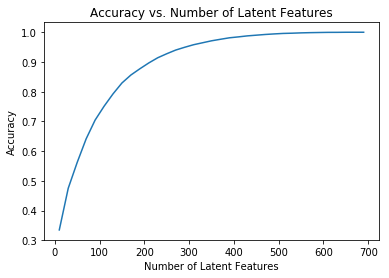

In [147]:
num_latent_feats = np.arange(10,700+10,20)
sum_errs = []

for k in num_latent_feats:
    # restructure with k latent features
    s_new, u_new, vt_new = np.diag(s[:k]), u[:, :k], vt[:k, :]
    
    # take dot product
    user_item_est = np.around(np.dot(np.dot(u_new, s_new), vt_new))
    
    # compute error for each prediction to actual value
    diffs = np.subtract(user_item_matrix, user_item_est)
    
    # total errors and keep track of them
    err = np.sum(np.sum(np.abs(diffs)))
    sum_errs.append(err)
    
    
plt.plot(num_latent_feats, 1 - np.array(sum_errs)/df.shape[0]);
plt.xlabel('Number of Latent Features');
plt.ylabel('Accuracy');
plt.title('Accuracy vs. Number of Latent Features');

`4.` From the above, we can't really be sure how many features to use, because simply having a better way to predict the 1's and 0's of the matrix doesn't exactly give us an indication of if we are able to make good recommendations.  Instead, we might split our dataset into a training and test set of data, as shown in the cell below.  

Use the code from question 3 to understand the impact on accuracy of the training and test sets of data with different numbers of latent features. Using the split below: 

* How many users can we make predictions for in the test set?  
* How many users are we not able to make predictions for because of the cold start problem?
* How many articles can we make predictions for in the test set?  
* How many articles are we not able to make predictions for because of the cold start problem?

In [148]:
df_train = df.head(40000)
df_test = df.tail(5993)

def create_test_and_train_user_item(df_train, df_test):
    '''
    INPUT:
    df_train - training dataframe
    df_test - test dataframe
    
    OUTPUT:
    user_item_train - a user-item matrix of the training dataframe 
                      (unique users for each row and unique articles for each column)
    user_item_test - a user-item matrix of the testing dataframe 
                    (unique users for each row and unique articles for each column)
    test_idx - all of the test user ids
    test_arts - all of the test article ids
    
    '''
    # Your code here
    user_item_train = create_user_item_matrix(df_train)
    user_item_test = create_user_item_matrix(df_test)
    
    test_idx = list(df_test['user_id'].unique())
    test_arts = list(df_test['article_id'].unique())
    return user_item_train, user_item_test, test_idx, test_arts
user_item_train, user_item_test, test_idx, test_arts = create_test_and_train_user_item(df_train, df_test)

In [149]:
#Training Part for the code below.
df_test.head()
#list(df_test['user_id'].unique())
#len(test_arts)
user_item_test.mean().sort_values(ascending=True)
train_id = user_item_train.index
ids = list(set(train_id) & set(test_idx))
print(ids)

[3968, 3777, 4002, 3684, 4293, 2917, 4487, 4231, 3527, 4204, 3532, 3024, 4274, 3801, 3093, 3989, 3990, 3193, 3740, 3998]


In [150]:
# Replace the values in the dictionary below
a = 662 
b = 574 
c = 20 
d = 0 


sol_4_dict = {
    'How many users can we make predictions for in the test set?': c , 
    'How many users in the test set are we not able to make predictions for because of the cold start problem?': a, 
    'How many articles can we make predictions for in the test set?': b,
    'How many articles in the test set are we not able to make predictions for because of the cold start problem?': d
}

t.sol_4_test(sol_4_dict)

Awesome job!  That's right!  All of the test articles are in the training data, but there are only 20 test users that were also in the training set.  All of the other users that are in the test set we have no data on.  Therefore, we cannot make predictions for these users using SVD.


`5.` Now use the **user_item_train** dataset from above to find U, S, and V transpose using SVD. Then find the subset of rows in the **user_item_test** dataset that you can predict using this matrix decomposition with different numbers of latent features to see how many features makes sense to keep based on the accuracy on the test data. This will require combining what was done in questions `2` - `4`.

Use the cells below to explore how well SVD works towards making predictions for recommendations on the test data.  

In [151]:
#Training Part for the code below.
user_item_train.head()

article_id,0.0,2.0,4.0,8.0,9.0,12.0,14.0,15.0,16.0,18.0,...,1434.0,1435.0,1436.0,1437.0,1439.0,1440.0,1441.0,1442.0,1443.0,1444.0
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [152]:
# fit SVD on the user_item_train matrix
u_train, s_train, vt_train = np.linalg.svd(user_item_train)

In [153]:
#Training Part for the code below.
matched_train_ids = user_item_train.index.isin(test_idx)
matched_train_cols = user_item_train.columns.isin(test_arts)

In [154]:
#Training Part for the code below.
matched_train_ids.shape

(4487,)

In [155]:
#Training Part for the code below.
u_test = u_train[matched_train_ids, :]
vt_test = vt_train[:, matched_train_cols]
print('test u shape is {} and vt shape is {}.'.format(u_test.shape, vt_test.shape))

test u shape is (20, 4487) and vt shape is (714, 574).


In [156]:
#Training Part for the code below.
len(ids)

20

In [ ]:
# Filter the user-item test set using the provided IDs
user_item_test_matched = user_item_test.loc[ids]

# Define a range of latent factors to evaluate
latent_factors = np.arange(0, 400, 10)

# Initialize empty lists to store train and test errors
train_sum_errs = []
test_sum_errs = []

# Iterate through the defined range of latent factors
for k in latent_factors:

    # Extract the corresponding diagonal matrix, user and item latent factor matrices
    s_train_new = np.diag(s_train[:k])
    u_train_new = u_train[:, :k]
    vt_train_new = vt_train[:k, :]

    # Extract the corresponding user and item latent factor matrices for the test set
    u_test_new = u_test[:, :k]
    vt_test_new = vt_test[:k, :]

    # Calculate the predicted user-item ratings for the train set
    user_item_train_prediction = np.around(np.dot(np.dot(u_train_new, s_train_new), vt_train_new))

    # Calculate the predicted user-item ratings for the matched test set
    user_item_test_prediction = np.around(np.dot(np.dot(u_test_new, s_train_new), vt_test_new))

    # Compute the train error by summing the absolute differences between predicted and actual ratings
    train_err = np.sum(np.sum(np.abs(np.subtract(user_item_train, user_item_train_prediction))))

    # Append the train error to the corresponding list
    train_sum_errs.append(train_err)

    # Compute the test error by summing the absolute differences between predicted and actual ratings
    test_err = np.sum(np.sum(np.abs(np.subtract(user_item_test_matched, user_item_test_prediction))))

    # Append the test error to the corresponding list
    test_sum_errs.append(test_err)


In [ ]:
# Calculate the accuracy for train and test sets by normalizing the sum of errors using the total number of ratings
train_accuracy = 1 - (np.array(train_sum_errs) / (user_item_train.shape[0] * user_item_train.shape[1]))
test_accuracy = 1 - (np.array(test_sum_errs) / (user_item_test_matched.shape[0] * user_item_test_matched.shape[1]))

# Create a line plot for both train and test accuracies
plt.plot(latent_factors, train_accuracy, label='train');
plt.plot(latent_factors, test_accuracy, label='test');

# Add descriptive labels for the x and y axes
plt.xlabel('# of Latent Features');
plt.ylabel('Accuracy of the Model');

# Add a comprehensive title for the plot
plt.title('Accuracy of the Model vs. Number of Latent Features');

# Display the plot
plt.show();


`6.` Use the cell below to comment on the results you found in the previous question. Given the circumstances of your results, discuss what you might do to determine if the recommendations you make with any of the above recommendation systems are an improvement to how users currently find articles? 

The results indicate that the accuracy curve is the inverse of the one observed during training. This suggests that increasing latent features leads to overfitting during training, resulting in a model that performs well on the training set but generalizes poorly to new data. To address this issue, we can try reducing the number of latent features.

Furthermore, the small size of the training and testing datasets limits the effectiveness of relying solely on SVD for recommendation generation. Additionally, the minimal overlap between users and movies in the training and testing sets prevents us from providing recommendations for all users. Instead of relying on a single recommendation system, we can combine the outputs of multiple methods, eliminating duplicates and assigning rankings to the recommendations. A/B testing can be employed to evaluate the performance of the combined recommendation system.

As more data becomes available, we can retrain the SVD model to incorporate additional users and movies, improving its accuracy and generalization capabilities.

Tracking time spent on an article can provide valuable insights into whether a user genuinely enjoys it or not. Users who spend more time on an article are likely to find it relevant and engaging, allowing us to recommend similar content in the future.

Incorporating user feedback into the recommendation system can further enhance its effectiveness. By collecting feedback on the accuracy of our recommendations, we can identify areas for improvement and adjust the model accordingly.

<a id='conclusions'></a>
### Extras
Using your workbook, you could now save your recommendations for each user, develop a class to make new predictions and update your results, and make a flask app to deploy your results.  These tasks are beyond what is required for this project.  However, from what you learned in the lessons, you certainly capable of taking these tasks on to improve upon your work here!


## Conclusion

> Congratulations!  You have reached the end of the Recommendations with IBM project! 

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the [rubric](https://review.udacity.com/#!/rubrics/2322/view). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations! 

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Recommendations_with_IBM.ipynb'])